In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Print total number of images in train and test sets
print("Number of images in train set:", len(train_dataset))
print("Number of images in test set:", len(test_dataset))

# Define the model
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)  # Example dropout rate
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Create an instance of the model
model = MNISTModel()

# Print the model summary
print(model)

# Define a function to train the model
def train(model, train_loader, optimizer, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total
    print(f'Epoch {epoch}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
    return accuracy

# Define a function to evaluate the model
def evaluate(model, test_loader):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(test_loader)
    accuracy = correct / total
    return avg_loss, accuracy

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store accuracy for plotting
train_accuracies = []
test_accuracies = []

# Training the model
for epoch in range(10):  # Number of epochs
    train_accuracy = train(model, train_loader, optimizer, epoch + 1)
    train_accuracies.append(train_accuracy)

    # Evaluate the model
    _, test_accuracy = evaluate(model, test_loader)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
torch.save(model.state_dict(), "base_model.pth")




Number of images in train set: 60000
Number of images in test set: 10000
MNISTModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1, Loss: 0.2371, Accuracy: 0.9277
Test accuracy: 0.9857
Epoch 2, Loss: 0.0777, Accuracy: 0.9784
Test accuracy: 0.9893
Epoch 3, Loss: 0.0552, Accuracy: 0.9843
Test accuracy: 0.9892
Epoch 4, Loss: 0.0420, Accuracy: 0.9875
Test accuracy: 0.9924
Epoch 5, Loss: 0.0355, Accuracy: 0.9901
Test accuracy: 0.9917
Epoch 6, Loss: 0.0298, Accuracy: 0.9909
Test accuracy: 0.9927
Epoch 7, Loss: 0.0263, Accuracy: 0.9922
Test accuracy: 0.99

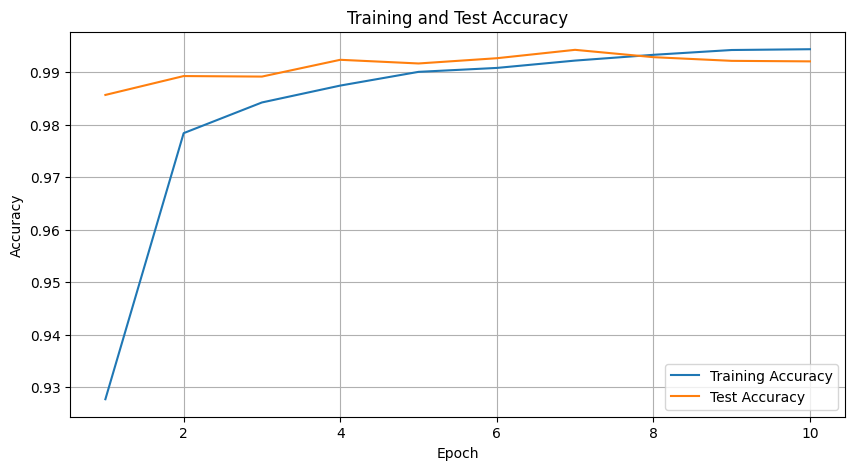

In [21]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy')  # Updated to 10 epochs
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy')  # Updated to 10 epochs
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-22-b3e2159aee13>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1j6vY3UCJm-hVYHcwXSFE9BPS0KiNoEmR
To: /content/video.mp4
100% 579k/579k [00:00<00:00, 74.2MB/s]


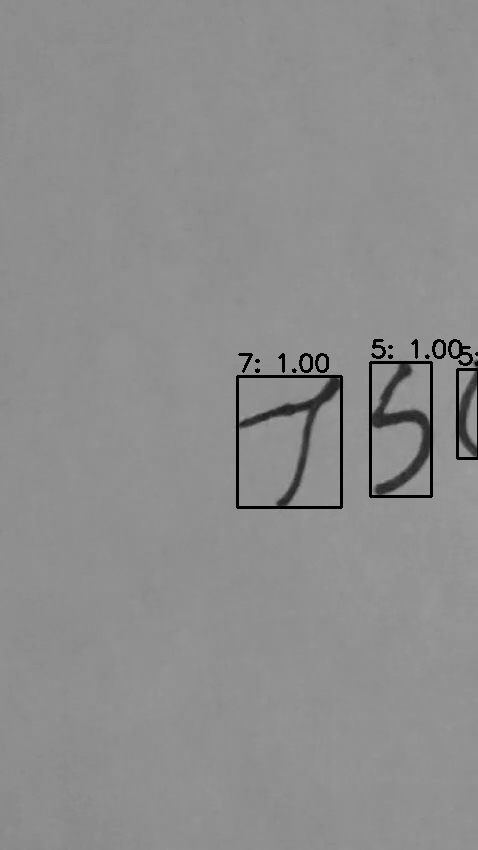

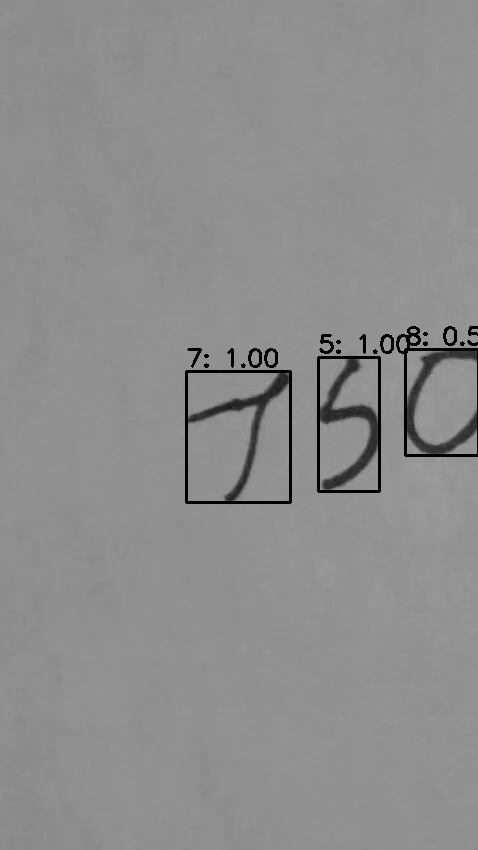

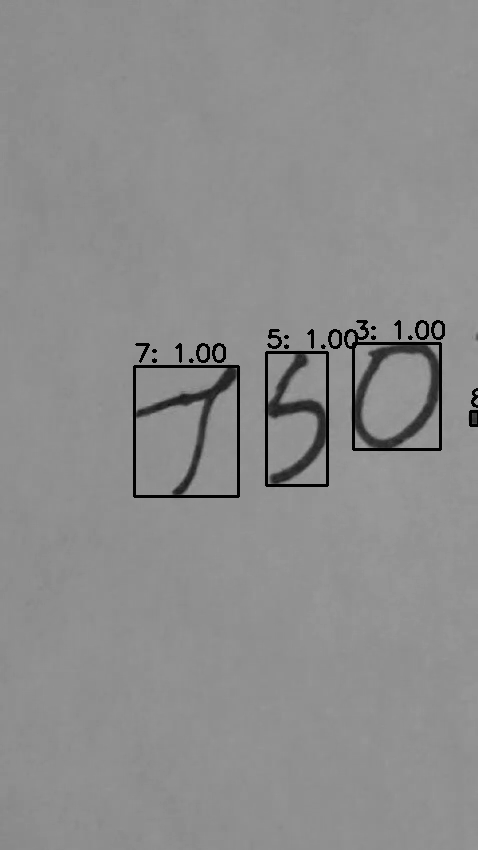

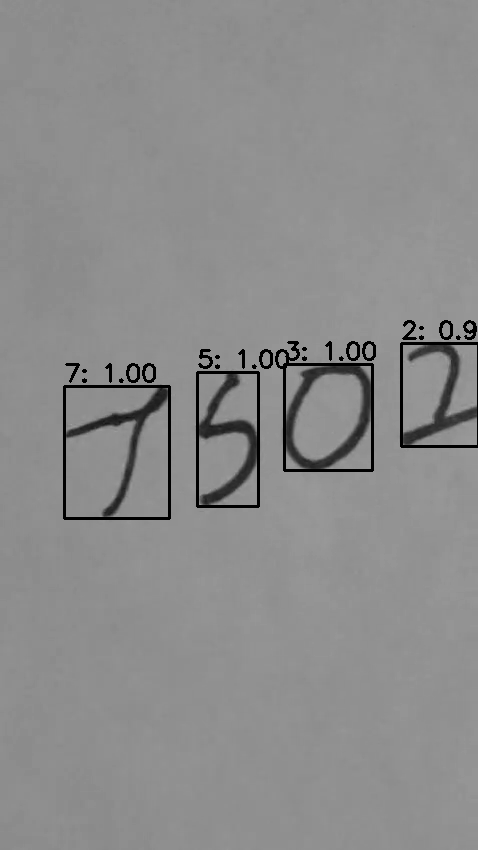

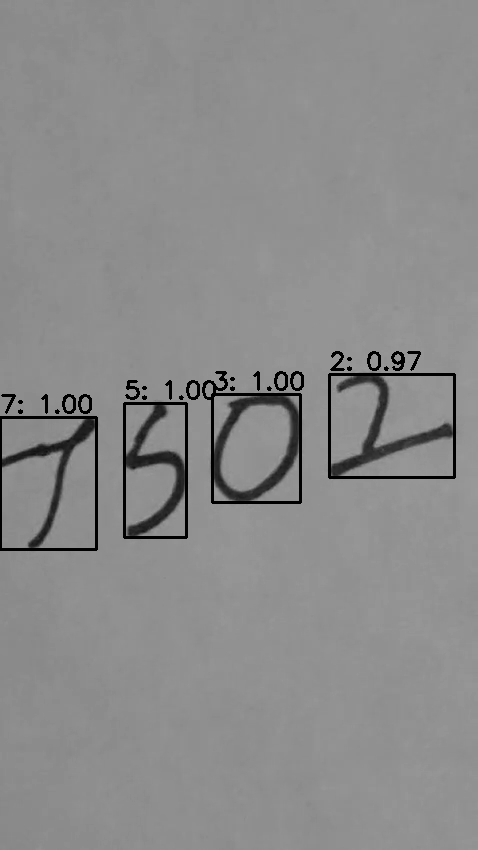

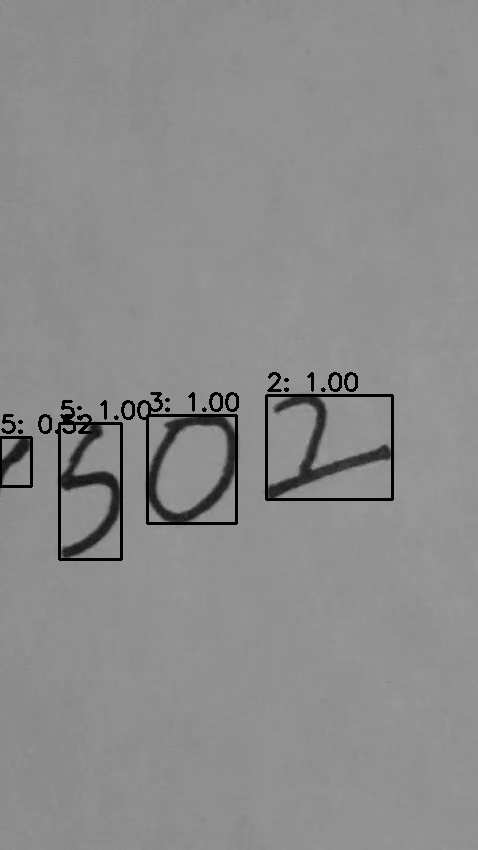

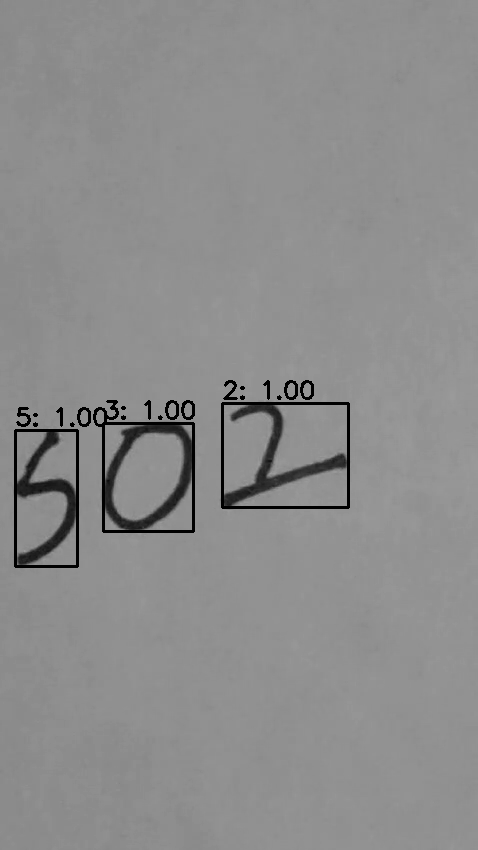

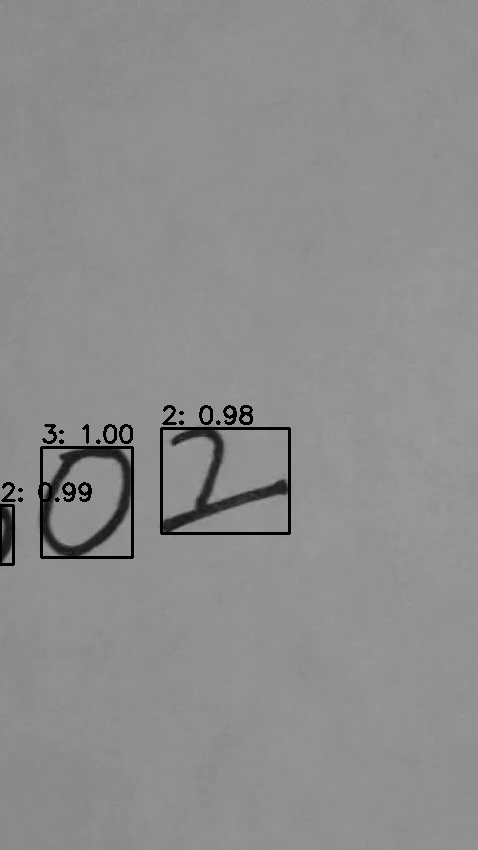

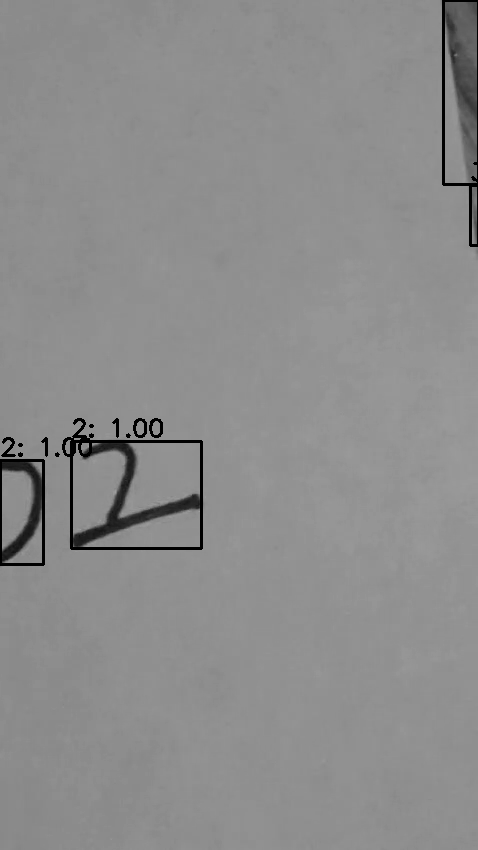

End of video


In [22]:
import cv2
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from google.colab.patches import cv2_imshow

# Update this path according to your environment
model_path = "/content/base_model.pth"  # Path to the saved PyTorch model

# Define the model class
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)  # Example dropout rate
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Load the model
model = MNISTModel()
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

# Define digit classes (modify if your model outputs different labels)
classes = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}

# Define a transform to preprocess the input data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Function to process the frame and detect digits
def process_frame(frame):
    # Blur the grayscale image to reduce noise
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)

    # Apply adaptive thresholding to create a binary image
    binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    # Find contours of digits
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Process and display each contour
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        # Filter contours based on size (adjust as needed)
        if w * h > 100:
            # Crop the digit region from the binary image
            digit_roi = binary[y:y + h, x:x + w]

            # Resize the digit ROI to match model input shape
            digit_roi = cv2.resize(digit_roi, (28, 28))

            # Convert the digit ROI to float32 and normalize pixel values
            digit_roi = transform(digit_roi)

            # Expand the dimensions (add an extra dimension for the batch)
            digit_roi = digit_roi.unsqueeze(0)  # Add batch dimension

            # Predict using the model
            with torch.no_grad():
                outputs = model(digit_roi)
                _, predicted_class = torch.max(outputs, 1)
                probability = F.softmax(outputs, dim=1)[0][predicted_class].item()

            # Display the digit and predicted value on the original frame
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = f"{classes[predicted_class.item()]}: {probability:.2f}"
            cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    return frame

# Load the video
!gdown --id 1j6vY3UCJm-hVYHcwXSFE9BPS0KiNoEmR -O video.mp4
cap = cv2.VideoCapture('/content/video.mp4')

# Initialize frame counter
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("End of video")
        break

    frame_count += 1

    # Process only every 12th frame
    if frame_count % 12 == 0:
        # Convert the frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Process the frame and detect digits
        processed_frame = process_frame(gray_frame)

        # Display the processed frame
        cv2_imshow(processed_frame)

    if cv2.waitKey(1) == ord('e'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
